$$
\begin{aligned}
\underset{\Large{\text{L.Lessard, Spring 2017}}}{\large{\text{Introduction to Optimization CS 524}}} \\
\end{aligned}
$$

$$
\begin{aligned}
\underset{\Large{\text{Due date: 11:00pm on Monday May 8, 2017}}}{\Large{\text{Determining Winning Strategies Using Game Theoretic Optimization}}} \\
\end{aligned}
$$

$$
\begin{aligned}
\underset{\large{\text{tuandinh@cs.wisc.edu}}}{\large{\text{Tuan Dinh}}} && \underset{\large{\text{varun@cs.wisc.edu}}}{\large{\text{Varun Sah}}} \\
\end{aligned}
$$

*****

<center> <h3>CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2017 </h3> </center>

<center> <h1>Determining Winning Strategies Using Game Theoretic Optimization</h1> </center>

<center> <h4>Tuan Dinh (tuandinh@cs.wisc.edu) &mdash; Varun Sah (varun@cs.wisc.edu)</h4> </center>

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
  1. [History and Background](#1.A.-History-and-Background)
  1. [Jargon](#1.B.-Jargon)
  1. [Outline](#1.C.-Outline)
1. [The Chess Ecosystem](#2.-The-Chess-Ecosystem)
  1. [Rules](#2.A.-Rules)
  1. [Ranking and Scoring](#2.B.-Ranking-and-Scoring)
  1. [Data](#2.C.-Data)
1. [Naive Model](#3.-Naive-Model)
  1. [Mathematical Model](#3.A.-Mathematical-model)
  1. [Solution](#3.B.-Solution)
  1. [Results and Discussion](#3.C.-Results-and-Discussion)
1. [Maximin Model](#4.-Maximin-Model)
  1. [Mathematical Model](#4.A.-Mathematical-model)
  1. [Solution](#4.B.-Solution)
  1. [Results and Discussion](#4.C.-Results-and-Discussion)
1. [Nash Equilibrium Model](#5.-Nash-Equilibrium-Model)
  1. [Mathematical Model](#5.A.-Mathematical-model)
  1. [Solution](#5.B.-Solution)
  1. [Results and Discussion](#5.C.-Results-and-Discussion)
1. [Budget Trade-off Model](#6.-Budget-Trade-off-Model)
  1. [Mathematical Model](#6.A.-Mathematical-model)
  1. [Solution](#6.B.-Solution)
  1. [Results and Discussion](#6.C.-Results-and-Discussion) 
1. [Results and Discussion](#7.-Results-and-Discussion)
1. [Conclusion](#8.-Conclusion)
1. [Appendix](#9.-Appendix)

## <center>1. Introduction</center> ##
In team sports, strategy plays a vital role in determining which team emerges victorious since team clashes cannot always be won by relying on individual prowess alone. The importance of strategy gains even more significance when the sport involves a series of head-to-head individual games between team members like in the [Davis Cup](https://en.wikipedia.org/wiki/Davis_Cup), [Fed Cup](https://en.wikipedia.org/wiki/Fed_Cup) or the [Chess Olympiad](https://en.wikipedia.org/wiki/Chess_Olympiad) where a good match-up strategy (who plays whom) can lead to results that defy expectations. 

Our project aims to solve the problem of determining the best match-up strategy that a team should adopt to maximize chances of winning in a sequence of individual games. 

### 1.A. History and Background ###
Historically, there have been several instances where team rubbers have been won purely on the basis of a match-up strategy (who plays whom), despite being at a disadvantage in terms of individual ability or expertise.
<p>At the Chess Olympiad in 2014, the Indian contingent, despite being seeded $19^{th}$, managed to win the bronze medal in the tournament. According to experts, strategic planning was key to India's success, apart from great performances by the members of the team ([citation article](https://www.sportskeeda.com/chess/solid-play-strategic-planning-key-to-indias-success-at-chess-olympiad)). The Indian team had decided to adopt their success strategy of the Asian Nations Cup, fielding the strongest players at the lower boards and a mix of highly rated and lower-rated but solid players at the top two boards.
</p>

<p> The aforementioned example, along with other 
</p>

### 1.B. Jargon ###
Here, we define a set of technical terms that form the foundation of the concepts discussed in the report.
<p><b>Rubber:</b> A rubber is a team contest consisting of a sequence of successive games that is won by the side that wins a majority of the individual games.
</p>
<p>
<b>Strategy:</b> In game theory, a player's strategy is any of the options he or she can choose in a setting where the outcome depends not only on his own actions but on the action of others. A player's strategy will determine the action the player will take at any stage of the game. In the case of a team contest(rubber), we define a strategy as the assignment of each team member to a member of the opposition.
</p>
<p>
<b>Pure Strategy:</b> A pure strategy is an unconditional, defined choice that a person makes in a situation or game. For example, in the game of Rock-Paper-Scissors,if a player would choose to only play scissors for each and every independent trial, regardless of the other player’s strategy, choosing scissors would be the player’s pure strategy. The probability for choosing scissors equal to 1 and all other options (paper and rock) is chosen with the probability of 0. The set of all options (i.e. rock, paper, and scissors) available in this game is known as the strategy set.
In the case of a team contest like the Chess Olympiad, an example of a team's pure strategy would be to always assign players as illustrated in the following figure:
</p>
![mixed strategy][cb_1] 
![mixed strategy][cb_2] 
![mixed strategy][cb_3] 
![mixed strategy][cb_4] 
<p>
<b>Mixed Strategy:</b> A mixed strategy is an assignment of a probability to each pure strategy. A mixed strategy is an assignment of probability to all choices in the strategy set. Using the example of Rock-Paper-Scissors, if a person’s probability of employing each pure strategy is equal, then the probability distribution of the strategy set would be 1/3 for each option, or approximately 33%. In other words, a person using a mixed strategy incorporates more than one pure strategy into a game. This allows for a player to randomly select a pure strategy. Since probabilities are continuous, there are infinitely many mixed strategies available to a player. A mixed strategy can simply be considered as the probability distribution one uses to randomly choose among available actions in order to avoid being predictable.

Of course, one can regard a pure strategy as a degenerate case of a mixed strategy, in which that particular pure strategy is selected with probability 1 and every other strategy with probability 0.
</p>
![mixed strategy][cb_1] 
![mixed strategy][cb_2] 
![mixed strategy][cb_3] 
![mixed strategy][cb_4] 
<p>
<b>Nash Equilibrium:</b>
In game theory, the Nash equilibrium is a solution concept of a non-cooperative game involving two or more players in which each player is assumed to know the equilibrium strategies of the other players, and no player has anything to gain by changing only his or her own strategy.
</p>

### 1.C. Outline###
<p>
Our project attempts to use a combination of optimization and the aforementioned game theoretic concepts for determining the optimal match-up strategy for a team to maximize its probability of winning a rubber under a set of conditions that simulate a real world scenario. 
</p>
<p>
We go about this task by building a series of optimization models each more comprehensive than the previous one. We start with the simple case of designing a winning pure strategy when the opposition's strategy is known. We then remove the assumption of knowledge of opposition's strategy in the second model and replace it with the assumption of that the opposition team determines its strategy rationally. In the subsequent model, we relax the restriction to pure strategies. In this third model, we try to find the optimal mixed strategy from the perspective of both teams to determine if a Nash equilibrium exists. Finally, we add the complexity of determining a team's composition (from a set of available players) in addition to a team's strategy while having a budget trade-off in place.  
</p>
<p>
Although we limit the discussion to clashes between Chess teams for the purpose of this project, the task at hand is extremely interesting because it is equally applicable to several other team sports such as tennis and boxing. The only prerequisite is the existence of an empirical or actual mathematical model to determine chances of winning individual matches or rounds for that sport. 
Moreover, the models developed within the project can also be used to develop strategies for online battle strategy games like Age of Empires and Clash of Clans as well as for determining squad composition and battle order in card and video games like Pokemon. 
</p>

<!--The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with [citations](https://en.wikipedia.org/wiki/Citation)) of how the problem came about, why it's important/interesting, and any other interesting facts you'd like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated?) Also give an outline of the rest of the report.

This section should be 300-600 words long, and **should be accessible to a general audience** (don't assume your reader has taken the class!). Feel free to include images if you think it'll be helpful:

For more help on using Markdown, see [this reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). -->

[cb_1]: ./images/cb.jpg
[cb_2]: ./images/cb_2.jpg
[cb_3]: ./images/cb.jpg
[cb_4]: ./images/cb_2.jpg
[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg

## <center>2. The Chess Ecosystem</center> ##
 
### 2.A. Rules ###
In tournaments like the [Chess Olympiad](https://en.wikipedia.org/wiki/Chess_Olympiad)) and the [World Team Chess Championship](https://en.wikipedia.org/wiki/World_Team_Chess_Championship), among others, each team clash (rubber) consists of 4 individual games.
At the start of the first game, a coin toss determines which team gets the color white for that round. In each subsequent round, the color allocation alternates between the teams. This is done in order to eliminate the [first-move advantage](https://en.wikipedia.org/wiki/First-move_advantage_in_chess) described in the next section.  
The winner of each game gets 1 point. Loser gets 0 and a draw results in both teams being allotted 0.5 points.


### 2.B. Ranking and Scoring ###
The [Elo rating system](https://en.wikipedia.org/wiki/Elo_rating_system) is a method for calculating the relative skill levels of players in competitor-versus-competitor games such as chess.

We modeled the winning probability of a player based on the ELO rating of the player and his opponent. The model used was based on a [study](https://chessprogramming.wikispaces.com/Pawn+Advantage%2C+Win+Percentage%2C+and+ELO) by Sune Fischer and Pradu Kannan in Dec. 2007. Details of the model can be found here: [Elo-Rating & Win-Probability](https://chessprogramming.wikispaces.com/Match+Statistics)
$score = \frac{1}{1 + 10^{-\frac{\Delta}{400}}}$    

The [first-move advantage](https://en.wikipedia.org/wiki/First-move_advantage_in_chess) in chess is the inherent advantage of the player (White) who makes the first move in chess. Chess players and theorists generally agree that White begins the game with some advantage. We have modeled this advantage by adding 35 to the Black side's player's ELO. [citation required]()  
white = black + 35   (ELO)   


Plus: weighted round: score of round k: $1 + \frac{1}{100}(1 - \frac{k}{N})$

Game scoring: 
Team Match (Rubber) scoring:  

In [9]:
# naive score function; discrete points {0, 0.5, 1}; unrealistic 
function get_simple_score(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 0.75 * (-1)^(order + 1)
    if x > 0 
        return 1
    elseif x < 0
        return 0
    else 
        return 0.5
    end  
end;

# expected score of a game (continuous); 
# each game identical; first-move advantage;
function get_chess_score(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 35*(-1)^(order + 1)
    return 1/(1 + 10^(-x/400)) 
end;

# expected score of a game; each game being distinct; first-move advantage;
function get_chess_score2(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 35*(-1)^(order % 2 + 1)      
    return 1/(1 + 10^(-x/400)) * (1.01 - 0.01round/N_PLAYERS)
end;

# expected score of a game; 
# each game being distinct; selection from a pool of players 
function get_chess_score3(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 35*(-1)^(order % 2 + 1)      
    return 1/(1 + 10^(-x/400)) * (1.01 - 0.01round/N_POOL)
end;

# total expected score of match; each game ientical
function get_match_score(team_player, team_opponent, order, elo)
    sum(get_chess_score(team_player[i], team_opponent[i], 
            i + order + 1, elo) for i=1:length(team_player))
end;
 
# total expected score of match; each game distinct
function get_match_score2(team_player, team_opponent, order, elo)
    sum(get_chess_score2(team_player[i], team_opponent[i], 
            i + order + 1, i, elo) for i=1:length(team_player))
end;

### 2.C. Data ###



In [65]:
# one is enough!! No of games - 1's score = 2's score
#Pkg.add("Images") # add images package if not already installed
using JuMP, Clp, Cbc, NamedArrays#, Images
using PyPlot as plt
import Combinatorics
elo = [2838, 2822, 2817, 2772, 2771, 2761, 
    2750, 2747, 2745, 2741, 2720, 2700, 2680]
price = [1000, 950, 930, 900, 850, 700, 690, 
    650, 630, 600, 580, 570, 560] * 0.001 

team_home = [2 4 7 8 11 12]
team_visitor = [1 3 5 6 9 10]

plan_visitor = [2 1 4 6 3 5] # fixed plan

N_PLAYERS = 4
N_CHOSEN = 4
N_POOL = 10;

LoadError: syntax: extra token "as" after end of expression

In [11]:
raw = readcsv("./data/Chess.csv")
(m,n) = size(raw)

players = raw[2:end, 2]
elos = raw[2:end, 3]
federations = raw[2:end, 6]
worth = raw[2:end, 9] # in thousand dollars
num_players = length(players)

player_elo = Dict(zip(players, elos))
player_country = Dict(zip(players, federations))
player_worth = Dict(zip(players, worth))

player_pool_USA = []
player_pool_Russia = []

for i in 2: m
    if raw[i, 6] == "United States"
        push!(player_pool_USA, raw[i, 2])
    elseif raw[i, 6] == "Russia"
        push!(player_pool_Russia, raw[i, 2])
    end
end

N_PLAYERS = 4
team_USA = player_pool_USA[1:N_PLAYERS]
team_Russia = player_pool_Russia[1:N_PLAYERS];

print(team_Russia[3], player_elo[team_Russia[3]])

# sticking to descending elo order
plan_Russia = [1 2 3 4];
pool = players;
# N_POOL = length(pool)
# N_CHOSEN = 4;

Peter Svidler2755

## <center>3. Naive Model</center> ##

We start by modelling the problem as a simple assignment problem.
This model assumes the opposition's strategy is already fixed and known to the team a priori.

### 3.A. Mathematical model ###
This is a simple assignment problem  
$Max \sum_{i=1}^N\sum_{j=1}^N x_{i,j} * score(a_i, b_j, j)$  
s.t. 
- x: binary
- $\sum_{i=1}^{N}x_{i,k} = 1$  
- $\sum_{k=1}^{N}x_{i,k} = 1$ 

A discussion of the modeling assumptions made in the problem (e.g. is it from physics? economics? something else?). Explain the decision variables, the constraints, and the objective function. Finally, show the optimization problem written in standard form. Discuss the model type (LP, QP, MIP, etc.). Equations should be formatted in $\LaTeX$ within the IJulia notebook.

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& f_0(x) \\
\text{subject to:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
& h_j(x) = 0 && j=1,\dots,r
\end{aligned}
$$

### 3.B. Solution ###

In [12]:
function get_fixed_strategy(N_PLAYERS, team_home, 
        team_visitor, plan_visitor, get_score, elo)
    simpleModel = Model(solver=CbcSolver())

    @variable(simpleModel, x[1:N_PLAYERS, 1:N_PLAYERS], Bin)

    @constraint(simpleModel, supply[k in 1:N_PLAYERS], 
                    sum(x[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(simpleModel, demand[k in 1:N_PLAYERS], 
                    sum(x[i, k] for i=1:N_PLAYERS) == 1)

    @objective(simpleModel, Max, sum(x[i, k] * get_score(
                team_home[i], team_visitor[plan_visitor[k]], k, k, elo) 
                for i=1:N_PLAYERS, k=1:N_PLAYERS))

    solve(simpleModel)

    xopt = getvalue(x)
    
    println("Strategy: ")
    for k in 1:N_PLAYERS
        for i in 1:N_PLAYERS
            if xopt[i, k] != 0
                @printf "%20s (%d) vs (%d) %s\n" team_home[i] elo[team_home[i]] elo[team_visitor[plan_visitor[k]]] team_visitor[plan_visitor[k]]
            end
        end
    end
    println("Score: ", getobjectivevalue(simpleModel))
end;

### 3.C. Results and Discussion ###


In [13]:
get_fixed_strategy(N_PLAYERS, 
    team_USA, team_Russia, plan_Russia, get_simple_score, player_elo);

Strategy: 
  Alexander Onischuk (2685) vs (2811) Vladimir Kramnik
           Wesley So (2815) vs (2783) Sergey Karjakin
     Fabiano Caruana (2802) vs (2755) Peter Svidler
     Hikaru Nakamura (2786) vs (2751) Ian Nepomniachtchi
Score: 3.0


In [14]:
get_fixed_strategy(N_PLAYERS, 
    team_USA, team_Russia, plan_Russia, get_chess_score, player_elo);

Strategy: 
     Fabiano Caruana (2802) vs (2811) Vladimir Kramnik
  Alexander Onischuk (2685) vs (2783) Sergey Karjakin
     Hikaru Nakamura (2786) vs (2755) Peter Svidler
           Wesley So (2815) vs (2751) Ian Nepomniachtchi
Score: 1.990270019642662


In [15]:
get_fixed_strategy(N_PLAYERS, 
    team_USA, team_Russia,  plan_Russia, get_chess_score2, player_elo);

Strategy: 
           Wesley So (2815) vs (2811) Vladimir Kramnik
  Alexander Onischuk (2685) vs (2783) Sergey Karjakin
     Hikaru Nakamura (2786) vs (2755) Peter Svidler
     Fabiano Caruana (2802) vs (2751) Ian Nepomniachtchi
Score: 1.9974265169199144


We now relax the assumption of knowledge of opposition's strategy. 

## <center>4. Maximin Model</center> ##

### 4.A. Mathematical model ###

This is a 2-layer assignment problem: 

X site: $\sum_{i=1}^{N}x_{i,k} = 1$ , $\sum_{k=1}^{N}x_{i,k} = 1$    
Y site: $\sum_{j=1}^{N}y_{j,k} = 1$ , $\sum_{k=1}^{N}y_{j,k} = 1$  

$Max_x min_y f(x,y) = \sum_{i=1}^N\sum_{j=1}^N\sum_{k=1}^N 
score(a_i, b_j, k) * x_{ik} * y_{jk}$   

Solution:   
(1) Consider an assignment of X as parameters of the function of y, f becomes:  
$f(x) = min_y \sum_{j=1}^N\sum_{k=1}^N (\sum_{i=1}^N 
score(a_i, b_j, k) * x_{ik}) * y_{jk}$  
- $\sum_{j=1}^{N}y_{j,k} = 1$ , $\sum_{k=1}^{N}y_{j,k} = 1$ 
- $0 \leq y \leq 1$  

The dual form of this is:  
$Max_{p, q,r} \sum_{j=1}^{N}{p_j} + \sum_{k=1}^{N}{q_k} 
+ \sum_{j=1}^{N}\sum_{k=1}^{N}r_{jk}$  
s.t.  
- p, q: free  
- $r_{jk} \leq 0$  
- $p_j + q_k + r_{jk} \leq \sum_{i=1}^N 
score(a_i, b_j, k) * x_{ik}$ for every j, k   

Since this is a linear programing problem so that a strong duality always hold.    

(2) Replace min function of y in f(x,y) with this dual form, we have the final model:  

$Max_{x, p, q,r} \sum_{j=1}^{N}{p_j} + \sum_{k=1}^{N}{q_k} 
+ \sum_{j=1}^{N}\sum_{k=1}^{N}r_{jk}$   
s.t.
- $x_{ik}$: binary  for every i, k   
- p, q: free  
- $r_{jk} \leq 0$ for every i, k   
- $\sum_{i=1}^{N}x_{i,k} = 1$ , $\sum_{k=1}^{N}x_{i,k} = 1$  
- $p_j + q_k + r_{jk} \leq \sum_{i=1}^N 
score(a_i, b_j, k) * x_{ik}$ for every j, k    



### 4.B. Solution ###



In [16]:
function get_team_pure_strategy_maximin(N_PLAYERS, 
        team_home, team_visitor, get_score, elo)
    nashModel = Model(solver=CbcSolver())

    @variable(nashModel, x[1:N_PLAYERS, 1:N_PLAYERS], Bin)
    @variable(nashModel, p[1:N_PLAYERS])
    @variable(nashModel, q[1:N_PLAYERS])
    @variable(nashModel, r[1:N_PLAYERS, 1:N_PLAYERS] <= 0)

    @constraint(nashModel, supply[k in 1:N_PLAYERS], 
                    sum(x[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(nashModel, demand[k in 1:N_PLAYERS], 
                    sum(x[i, k] for i=1:N_PLAYERS) == 1)

    @constraint(nashModel, mincons[j in 1:N_PLAYERS, k in 1:N_PLAYERS], 
        p[j] + q[k] + r[j, k] <= 
            sum(get_score(team_home[i], team_visitor[j], k, k, elo) * x[i, k] 
                                    for i=1:N_PLAYERS))

    @objective(nashModel, Max, sum(p) + sum(q) + sum(r))        

    solve(nashModel)

    println(getobjectivevalue(nashModel))
    xopt = getvalue(x)
    solution_x = NamedArray(Int[xopt[i, k] for i=1:N_PLAYERS, k=1:N_PLAYERS])
    println(solution_x)
    get_expected_opponent_pure_strategy_maximin(N_PLAYERS, team_home, 
                                team_visitor, get_score, player_elo, xopt)
end;

function get_expected_opponent_pure_strategy_maximin(N_PLAYERS, 
                                team_home, team_visitor, get_score, elo, xopt)
    ym = Model(solver=CbcSolver())

    @variable(ym, y[1:N_PLAYERS, 1:N_PLAYERS], Bin)

    @constraint(ym, supply[k in 1:N_PLAYERS], 
                                    sum(y[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(ym, demand[k in 1:N_PLAYERS], 
                                    sum(y[i, k] for i=1:N_PLAYERS) == 1)

    @expression(ym, score, sum(get_score(team_home[i], 
                    team_visitor[j], k, k, elo) * xopt[i, k] * y[j, k] 
                    for i=1:N_PLAYERS, j in 1:N_PLAYERS, k in 1:N_PLAYERS))

    @objective(ym, Min, score)

    solve(ym)
    println(getobjectivevalue(ym))
    yopt = getvalue(y)
    solution_y = NamedArray(Int[yopt[j, k] for j=1:N_PLAYERS, k=1:N_PLAYERS])
    println(solution_y)
    print_pure_strategy(N_PLAYERS, team_home, team_visitor, elo, xopt, yopt)
end;
                                    
function print_pure_strategy(N_PLAYERS, 
                                team_home, team_visitor, elo, xopt, yopt)
    println("Strategy: ")
    for k in 1:N_PLAYERS # round
        print("Round: ", k, "\t" )
        for i in 1:N_PLAYERS
            if xopt[i, k] != 0
                print(team_home[i], " (", elo[team_home[i]], ")")
            end
        end
        for j in 1:N_PLAYERS
            if yopt[j, k] != 0
                println("\t", "\t  vs.\t", 
                        team_visitor[j], " (",elo[team_visitor[j]], ")")
            end
        end        
    end
end;

Visitor (Minimax)

In [17]:
function get_opponent_pure_strategy_minimax(N_PLAYERS, team_home, 
        team_visitor, get_score, elo)
    
    nashModel = Model(solver=CbcSolver())

    @variable(nashModel, y[1:N_PLAYERS, 1:N_PLAYERS], Bin)
    @variable(nashModel, p[1:N_PLAYERS])
    @variable(nashModel, q[1:N_PLAYERS])
    @variable(nashModel, r[1:N_PLAYERS, 1:N_PLAYERS] >= 0)

    @constraint(nashModel, supply[k in 1:N_PLAYERS], 
                    sum(y[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(nashModel, demand[k in 1:N_PLAYERS], 
                    sum(y[i, k] for i=1:N_PLAYERS) == 1)

    @constraint(nashModel, mincons[i in 1:N_PLAYERS, k in 1:N_PLAYERS], 
        p[i] + q[k] + r[i, k] >= 
            sum(get_score(team_home[i], team_visitor[j], k, k, elo) * y[j, k] 
                                    for j=1:N_PLAYERS))

    @objective(nashModel, Min, sum(p) + sum(q) + sum(r))        

    solve(nashModel)

    println(getobjectivevalue(nashModel))
    yopt = getvalue(y)
    solution_y = NamedArray([yopt[j, k] for j=1:N_PLAYERS, k=1:N_PLAYERS])
    println(solution_y)
    get_expected_team_pure_strategy_minimax(N_PLAYERS, 
                        team_home, team_visitor, get_score, player_elo, yopt)
end;
                                    
function get_expected_team_pure_strategy_minimax(N_PLAYERS, 
                                team_home, team_visitor, get_score, elo, yopt)
    xm = Model(solver=CbcSolver())

    @variable(xm, x[1:N_PLAYERS, 1:N_PLAYERS], Bin)

    @constraint(xm, supply[k in 1:N_PLAYERS], 
                                    sum(x[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(xm, demand[k in 1:N_PLAYERS], 
                                    sum(x[i, k] for i=1:N_PLAYERS) == 1)

    @expression(xm, score, sum(get_score(team_home[i], 
                    team_visitor[j], k, k, elo) * yopt[j, k] * x[i, k] 
                    for i=1:N_PLAYERS, j in 1:N_PLAYERS, k in 1:N_PLAYERS))

    @objective(xm, Max, score)

    solve(xm)
    println(getobjectivevalue(xm))
    xopt = getvalue(x)
    solution_x = NamedArray(Int[xopt[i, k] for i=1:N_PLAYERS, k=1:N_PLAYERS])
    println(solution_x)
    print_pure_strategy(N_PLAYERS, team_home, team_visitor, elo, xopt, yopt)
end;


### 4.C. Results and Discussion ###

In [18]:
get_team_pure_strategy_maximin(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score2, player_elo);

1.9927314745883487
4×4 Named Array{Int64,2}
A ╲ B │ 1  2  3  4
──────┼───────────
1     │ 0  1  0  0
2     │ 1  0  0  0
3     │ 0  0  1  0
4     │ 0  0  0  1
1.9927314745883484
4×4 Named Array{Int64,2}
A ╲ B │ 1  2  3  4
──────┼───────────
1     │ 0  1  0  0
2     │ 0  0  1  0
3     │ 1  0  0  0
4     │ 0  0  0  1
Strategy: 
Round: 1	Fabiano Caruana (2802)		  vs.	Peter Svidler (2755)
Round: 2	Wesley So (2815)		  vs.	Vladimir Kramnik (2811)
Round: 3	Hikaru Nakamura (2786)		  vs.	Sergey Karjakin (2783)
Round: 4	Alexander Onischuk (2685)		  vs.	Ian Nepomniachtchi (2751)


In [19]:
get_opponent_pure_strategy_minimax(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score2, player_elo);

1.9944383641261818
4×4 Named Array{Float64,2}
A ╲ B │   1    2    3    4
──────┼───────────────────
1     │ 1.0  0.0  0.0  0.0
2     │ 0.0  0.0  1.0  0.0
3     │ 0.0  1.0  0.0  0.0
4     │ 0.0  0.0  0.0  1.0
1.9944383641261816
4×4 Named Array{Int64,2}
A ╲ B │ 1  2  3  4
──────┼───────────
1     │ 0  1  0  0
2     │ 1  0  0  0
3     │ 0  0  1  0
4     │ 0  0  0  1
Strategy: 
Round: 1	Fabiano Caruana (2802)		  vs.	Vladimir Kramnik (2811)
Round: 2	Wesley So (2815)		  vs.	Peter Svidler (2755)
Round: 3	Hikaru Nakamura (2786)		  vs.	Sergey Karjakin (2783)
Round: 4	Alexander Onischuk (2685)		  vs.	Ian Nepomniachtchi (2751)


Since the Maximin (USA) and Minimax (Russia) optimal strategies have different optimal values, a pure Nash equilibrium does not exist. We now consider mixed strategies in an attempt to find a Nash Equilibrium.

## <center>5. Nash Equilibrium Model</center> ##
  
### 5.A. Mathematical model ###

#### Primal 
$Max_p min_j {g_j}$  
s.t. 
- $p_i \geq 0$ with i=1,..,N!
- $\sum_{i=1}^{N!} p_i = 1$  
- $g_j = \sum_{i=1}^{N!} p_i * score(s_{i}^A, s_j^B)$ for j=1,..,M   

Suppose the probability of $a_i$ playing at position k is $x_{ik}$ 
- they are independent with strategies of b
- $\sum_{i=1}^{N}x_{i,k} = 1$ , $\sum_{k=1}^{N}x_{i,k} = 1$    

Consider a strategy of B: $s_j^B = [b_{j1}, b_{j2}, ..., b_{jM}]$, we have:  
- Total score that $b_{jk}$ contributes to $g_j$ is: 
$\sum_{i=1}^N score(i, j, k) * x_{ik}$       

This can be modeled as a relaxed assignment problem.  
Similar to solution of pure strategy using dual form, we can model this as:    
$Max_{x, p, q,r} \sum_{j=1}^{N}{p_j} + \sum_{k=1}^{N}{q_k} 
+ \sum_{j=1}^{N}\sum_{k=1}^{N}r_{jk}$   
s.t.
- $0 \leq x_{ik} \leq 1$ for every i, k  (c0) 
- p, q: free  
- $r_{jk} \leq 0$ for every j, k   
- $\sum_{i=1}^{N}x_{i,k} = 1$ (c1)   
- $\sum_{k=1}^{N}x_{i,k} = 1$ (c2)   
- $p_j + q_k + r_{jk} \leq \sum_{i=1}^N 
score(i, j, k) * x_{ik}$ for every j, k (c3)  

#### Dual
Now, we find the dual form of the model above:   
$Min_{a, b, c, e} \sum_{i=1}^{N}{b_ji} + \sum_{k=1}^{N}{c_k} 
+ \sum_{i=1}^{N}\sum_{k=1}^{N}e_{ik}$   
s.t.
- $0 \leq a_{jk} \leq 1$ for every j, k   (for c3)   
- b, c: free (for c1 & c2)  
- $e_{ik} \geq 0$ for every i, k (for c0)
- $\sum_{j=1}^{N}a_{j,k} = 1$ , $\sum_{k=1}^{N}a_{j,k} = 1$  
- $b_i + c_k + e_{ik} \geq \sum_{j=1}^N 
score(i, j, k) * a_{jk}$ for every i, k 

This is exactly same as the primal form of the Minimax:  
#### Primal form of Opponent (Minimax)  :    
$Min_{y, p, q,r} \sum_{i=1}^{N}{p_i} + \sum_{k=1}^{N}{q_k} 
+ \sum_{i=1}^{N}\sum_{k=1}^{N}r_{ik}$   
s.t.
- $0 \leq y_{jk} \leq 1$ for every j, k   
- p, q: free  
- $r_{ik} \geq 0$ for every i, k   
- $\sum_{j=1}^{N}y_{j,k} = 1$     
- $\sum_{k=1}^{N}y_{j,k} = 1$    
- $p_i + q_k + r_{ik} \geq \sum_{j=1}^N 
score(i, j, k) * y_{jk}$ for every i, k   

### 5.B. Solution ###

In [20]:
function get_MSNE(N_PLAYERS, team_home, team_visitor, get_score, elo)
    nashModel = Model(solver=ClpSolver())

    @variable(nashModel, 1 >= x[1:N_PLAYERS, 1:N_PLAYERS] >= 0)
    @variable(nashModel, p[1:N_PLAYERS])
    @variable(nashModel, q[1:N_PLAYERS])
    @variable(nashModel, r[1:N_PLAYERS, 1:N_PLAYERS] <= 0)

    @constraint(nashModel, supply[k in 1:N_PLAYERS], 
                    sum(x[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(nashModel, demand[k in 1:N_PLAYERS], 
                    sum(x[i, k] for i=1:N_PLAYERS) == 1)

    @constraint(nashModel, mincons[j in 1:N_PLAYERS, k in 1:N_PLAYERS], 
        p[j] + q[k] + r[j, k] <= 
            sum(get_score(team_home[i], team_visitor[j], k, k, elo) 
                                    * x[i, k] for i=1:N_PLAYERS))

    @objective(nashModel, Max, sum(p) + sum(q) + sum(r))        

    solve(nashModel)

    println(getobjectivevalue(nashModel))
    xopt = getvalue(x)
    solution_x = NamedArray([xopt[i, k] for i=1:N_PLAYERS, k=1:N_PLAYERS])
    println(solution_x)
end;

In [21]:
function get_MSNE_opponent(N_PLAYERS, team_home, team_visitor, get_score, elo)
    nashModel = Model(solver=ClpSolver())

    @variable(nashModel, 0 <= y[1:N_PLAYERS, 1:N_PLAYERS] <= 1)
    @variable(nashModel, p[1:N_PLAYERS])
    @variable(nashModel, q[1:N_PLAYERS])
    @variable(nashModel, r[1:N_PLAYERS, 1:N_PLAYERS] >= 0) # change

    @constraint(nashModel, supply[k in 1:N_PLAYERS], 
                    sum(y[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(nashModel, demand[k in 1:N_PLAYERS], 
                    sum(y[i, k] for i=1:N_PLAYERS) == 1)

    @constraint(nashModel, maxcons[i in 1:N_PLAYERS, k in 1:N_PLAYERS],
        p[i] + q[k] + r[i, k] >= 
            sum(get_score(team_home[i], team_visitor[j], k%2, k, elo) 
                                    * y[j, k] for j=1:N_PLAYERS))

    @objective(nashModel, Min, sum(p) + sum(q) + sum(r))        

    solve(nashModel)

    println(getobjectivevalue(nashModel))
    yopt = getvalue(y)
    solution_y = NamedArray([yopt[j, k] for j=1:N_PLAYERS, k=1:N_PLAYERS])
    println(solution_y)
end;

### 5.C. Results and Discussion ###

In [22]:
get_MSNE(N_PLAYERS, team_USA, team_Russia, get_chess_score2, player_elo);

1.994211025995414
4×4 Named Array{Float64,2}
A ╲ B │        1         2         3         4
──────┼───────────────────────────────────────
1     │      0.0  0.714061       0.0  0.285939
2     │ 0.794595       0.0  0.205405       0.0
3     │ 0.205405       0.0  0.794595       0.0
4     │      0.0  0.285939       0.0  0.714061


In [23]:
get_MSNE_opponent(N_PLAYERS, team_USA, team_Russia, get_chess_score2, player_elo);

1.9942110259954142
4×4 Named Array{Float64,2}
A ╲ B │        1         2         3         4
──────┼───────────────────────────────────────
1     │ 0.430404       0.0  0.569596       0.0
2     │ 0.461659  0.107937  0.430404       0.0
3     │ 0.107937  0.892063       0.0       0.0
4     │      0.0       0.0       0.0       1.0


## <center>6. Budget Trade-off Model</center> ##

### 6.A. Mathematical model ###
We have nPool players, selecting nchosen players.   

Since x is probability, we use a binary variable z to represent connections. 

- $z_i = 0 \implies x_i = 0: \sum_{k=1}^{N}y_{i,k} \leq 1 - \sum_{k=1}^{N}z_{i,k}$    
- $z_i = 1 \implies y_i = 0: \sum_{k=1}^{N}x_{i,k} \leq \sum_{k=1}^{N}z_{i,k}$   

The model becomes:   
$Max_{x, z, p, q, r} \sum_{j=1}^{N}{p_j} (1 - \sum_{k=1}^{N}z_{j,k}) 
+ \sum_{k=1}^{N}{q_k} 
+ \sum_{j=1}^{N}\sum_{k=1}^{N}r_{jk}$   
s.t.
- $0 \leq x_{ik} \leq 1$ for every i, k   
- z: binary
- q: free  
- $p_{j} \leq 0$ for every j    
- $r_{jk} \leq 0$ for every i, k 
- $\sum_{i=1}^{N}x_{i,k} = 1$ , $\sum_{k=1}^{N}x_{i,k} \leq 1$ (loose => 0)    
- $\sum_{i=1}^{N}z_{i,k} = 1$ , $\sum_{k=1}^{N}z_{i,k} \leq 1$  
- $\sum_{k=1}^{N}x_{i,k} \leq \sum_{k=1}^{N}z_{i,k}$   
- $p_j + q_k + r_{jk} \leq \sum_{i=1}^N 
score(a_i, b_j, k) * x_{ik}$ for every j, k    

Using epigraph, we can convert quadratic objective into linear:   
$Max \sum_{j=1}^{N}{p_j} (1 - \sum_{k=1}^{N}z_{j,k}) = Max \sum_{j=1}^{N}{t_j}$
- $t_j \leq 0$   
- $t_j \geq -\infty * (1 - \sum_{k=1}^{N}z_{j,k})$   
- $t_j \leq p_j + \infty * \sum_{k=1}^{N}z_{j,k}$


### 6.B. Solution ###

In [24]:
function select_from_pool_mixed(N_POOL, N_CHOSEN, get_score, elo)
    inf = -1000
    sup = 1000 #dangerous

    xm = Model(solver=CbcSolver())

    @variable(xm, 0 <= x[1:N_POOL, 1:N_CHOSEN] <= 1)
    @variable(xm, z[1:N_POOL, 1:N_CHOSEN], Bin)
    @variable(xm, p[1:N_POOL] <= 0) #dual corresponding to <= 1
    @variable(xm, q[1:N_CHOSEN])
    @variable(xm, r[1:N_POOL, 1:N_CHOSEN] <= 0)
    @variable(xm, t[1:N_POOL] <= 0)

    @constraint(xm, supply[i in 1:N_POOL], 
                    sum(z[i, k] for k=1:N_CHOSEN) <= 1)
    @constraint(xm, demand[k in 1:N_CHOSEN], 
                    sum(z[i, k] for i=1:N_POOL) == 1)
                            
    @constraint(xm, supplyProb[i in 1:N_POOL], 
                                sum(x[i, k] for k=1:N_CHOSEN) <= 1)
    @constraint(xm, demandProb[k in 1:N_CHOSEN], 
                                sum(x[i, k] for i=1:N_POOL) == 1)

    # This is not correct for mixed since x is prob
    # z = 0 => x = 0
    @constraint(xm, node[i in 1:N_POOL], 
            sum(x[i, k] for k=1:N_CHOSEN) <= sum(z[i, k] for k=1:N_CHOSEN))
                                                                    
    @constraint(xm, icons[j in 1:N_POOL], t[j] >= 
                                (1 - sum(z[j, k] for k=1:N_CHOSEN))*inf)
        
    @constraint(xm, ucons[j in 1:N_POOL], t[j] <= 
                                p[j] + sup*sum(z[j, k] for k=1:N_CHOSEN))

    @constraint(xm, mincons[j in 1:N_POOL, k in 1:N_CHOSEN], 
        p[j] + q[k] + r[j, k]  <= sum(get_score(i, j, k, k, elo) 
                                                    * x[i, k] for i=1:N_POOL))

    @objective(xm, Max, sum(t) + sum(q) + sum(r))        

    solve(xm)
    println(getobjectivevalue(xm))
    xopt = getvalue(x)                                                                                                         
    solution_x = NamedArray([xopt[i, k] for i=1:N_POOL, k=1:N_CHOSEN])
    println(solution_x)
    return xopt
end;

In [52]:
function select_with_budget_mixed(lambda, N_POOL, N_CHOSEN, 
        get_score, elo, price)
    inf = -1000
    sup = 1000 #dangerous

    xm = Model(solver=CbcSolver())

    @variable(xm, 0 <= x[1:N_POOL, 1:N_CHOSEN] <= 1)
    @variable(xm, z[1:N_POOL, 1:N_CHOSEN], Bin)
    @variable(xm, p[1:N_POOL] <= 0) #dual corresponding to <= 1
    @variable(xm, q[1:N_CHOSEN])
    @variable(xm, r[1:N_POOL, 1:N_CHOSEN] <= 0)
    @variable(xm, t[1:N_POOL] <= 0)

    @constraint(xm, supply[i in 1:N_POOL], 
        sum(z[i, k] for k=1:N_CHOSEN) <= 1)
    @constraint(xm, demand[k in 1:N_CHOSEN], 
                    sum(z[i, k] for i=1:N_POOL) == 1)
                            
    @constraint(xm, supplyProb[i in 1:N_POOL], 
                                sum(x[i, k] for k=1:N_CHOSEN) <= 1)
    @constraint(xm, demandProb[k in 1:N_CHOSEN], 
                                sum(x[i, k] for i=1:N_POOL) == 1)

    # z = 0 => x = 0
    @constraint(xm, node[i in 1:N_POOL], 
            sum(x[i, k] for k=1:N_CHOSEN) <= sum(z[i, k] for k=1:N_CHOSEN))
                                                                    
    @constraint(xm, icons[j in 1:N_POOL], t[j] >= 
                                (1 - sum(z[j, k] for k=1:N_CHOSEN))*inf)
        
    @constraint(xm, ucons[j in 1:N_POOL], t[j] <= 
                                p[j] + sup*sum(z[j, k] for k=1:N_CHOSEN))

    @constraint(xm, mincons[j in 1:N_POOL, k in 1:N_CHOSEN], 
        p[j] + q[k] + r[j, k]  <= sum(get_score(i, j, k, k, elo) 
                                                    * x[i, k] for i=1:N_POOL))
    @expression(xm, playercost,  lambda * 
                sum(sum(z[i, k] for k=1:N_CHOSEN)* price[i] for i=1:N_POOL))
    @objective(xm, Max, sum(t) + sum(q) + sum(r) - playercost)        

    solve(xm)
#     println(getobjectivevalue(xm))
    xopt = getvalue(x)                                                                                                         
#     solution_x = NamedArray([xopt[i, k] for i=1:N_POOL, k=1:N_CHOSEN])
#     println(solution_x)
    return [xopt, getobjectivevalue(xm), getvalue(playercost)] 
end;

### Pareto

In [59]:
# compute optimal tradeoff curve (this may take a few seconds)
N = 50
lambda_values = logspace(0,0.1,N)
cost = zeros(N)
score = zeros(N)
for (i, lambda) in enumerate(lambda_values)
    result = select_with_budget_mixed(lambda, N_POOL, N_CHOSEN, 
        get_chess_score3, elo, worth * 0.001)
    cost[i] = result[3]
    score[i] = result[2] + lambda * result[3]
end

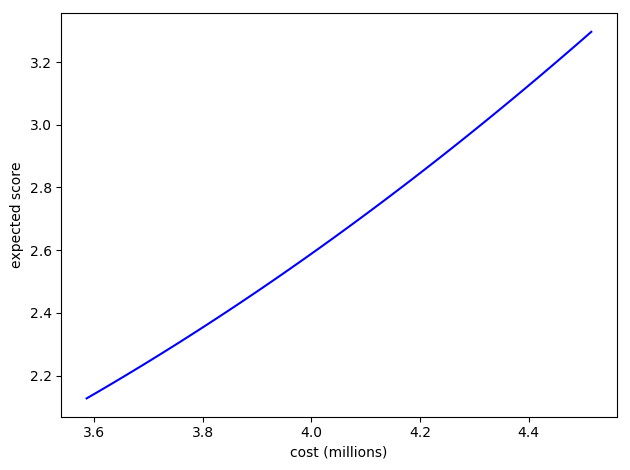

In [60]:
# plot tradeoff curve
plot(cost, score,"b-")
xlabel("cost (millions)")
ylabel("expected score")
# axis([1.5,4.5,0,.4]);
tight_layout()

### 6.C. Results and Discussion ###

In [26]:
xopt = select_from_pool_mixed(N_POOL, N_CHOSEN,  get_chess_score3, elo);

2.3287207245266277
10×4 Named Array{Float64,2}
A ╲ B │        1         2         3         4
──────┼───────────────────────────────────────
1     │      0.0  0.629523       0.0  0.370477
2     │      0.0  0.370477       0.0  0.629523
3     │ 0.516751       0.0  0.483249       0.0
4     │ 0.483249       0.0  0.516751       0.0
5     │      0.0       0.0       0.0       0.0
6     │      0.0       0.0       0.0       0.0
7     │      0.0       0.0       0.0       0.0
8     │      0.0       0.0       0.0       0.0
9     │      0.0       0.0       0.0       0.0
10    │      0.0       0.0       0.0       0.0


In [58]:
result = select_with_budget_mixed(0.01, N_POOL, N_CHOSEN, 
    get_chess_score3, elo, worth * 0.001)

3-element Array{Any,1}:
  [0.0 0.629523 0.0 0.370477; 0.0 0.370477 0.0 0.629523; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
 2.28917                                                                                      
 0.0395504                                                                                    

## <center>7. Results and Discussion</center> ##


<!-- Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

Use plots (see `PyPlot` examples from class), or you can display results in a table like this:
-->

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned |\$1600 |
| col 2 is      | centered      |  \$12 |
| zebra stripes | are neat      |   \$1 |


## <center>8. Conclusion</center> ##

<p> In this project, we have illustrated how optimization techniques can be leveraged to determine the best strategy for a team to use in order to maximize winning chances in chess clashes. We also illustrated how to determine the best chess team composition to maximize probability of winning under budget constraints.</p>
<p> The optimization models built as part of this project project can be applied, without modification, to determine optimal strategies for any team sports with rubbers that are non-cooperative in nature. The Davis cup and the Fed Cup are examples of tournaments in the realm of tennis where these models can potentially prove to be extremely effective for maximizing winning probabilities.</p>
The models built in this project, however, are not applicable to all team sports. Since they do not account for the element of cooperation between team members, they would require modification in order to determine strategies for team sports like soccer and basketball. An interesting future direction for this project would be to extend the models to include cooperative team sports as well.    

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.

## <center>9. Appendix</center> ##

### Nash Equilibrium by enumeration of strategy set ##

In [28]:
import Combinatorics
function get_MSNE_by_enumeration(score_matrix::Array)
    n = size(scores_matrix)[1]
    # for primal - P person
    m = Model(solver=ClpSolver())

    @variable(m, 1>= p[1:n] >=0)
    @variable(m, t)

    @constraint(m, sum(p) == 1)
    @constraint(m, min_const[k in 1:n], 
        sum(p[i] * score_matrix[i, k] for i=1:n) >= t)
    # Max min (g1, g2, ..., gn)
    @objective(m, Max, t)
    solve(m)
                
    popt = getvalue(p)
#     println(popt)
    println("Optimal Score: ", getobjectivevalue(m))
    return popt
end;
function get_MSNE_dual_by_enumeration(score_matrix::Array)
    n = size(scores_matrix)[2]
    # for primal - P person
    m = Model(solver=ClpSolver())

    @variable(m, 1>= q[1:n] >=0)
    @variable(m, t)

    @constraint(m, sum(q) == 1)
    @constraint(m, max_const[k in 1:n], 
        sum(q[i] * score_matrix[k, i] for i=1:n) <= t)
    # Max min (g1, g2, ..., gn)
    @objective(m, Min, t)
    solve(m)
                
    qopt = getvalue(q)
#     println(qopt)
    println("Optimal Score: ", getobjectivevalue(m))
    return qopt
end;            

In [29]:
# score_matrix function from 2 lists
function get_score_matrix(list1::Array, list2::Array, players_dict, 
        get_match)
    # assume that team 1 plays firstly
    dim1 = length(list1)
    dim2 = length(list2)
    scores = Matrix(dim1, dim2)
    for i in 1:dim1
        for j in 1:dim2
            scores[i, j] = get_match(list1[i], list2[j], 1, players_dict)
        end
    end
    return scores
end;
# ordered combination: return a list of nplayers obtained from a pool
function get_combinations(list_players::Array, nchosen::Int)
    return collect(combinations(list_players, nchosen))
end;

function get_permutations(list_players::Array)
    return collect(permutations(list_players, N_PLAYERS))
end;

In [66]:
home_combinations = get_combinations(team_home, N_PLAYERS)
visitor_combinations = get_combinations(team_visitor, N_PLAYERS)

list_home = get_permutations(team_USA[1:N_PLAYERS])
list_visitor = get_permutations(team_Russia[1:N_PLAYERS])

println(length(list_home))
println(length(list_visitor))
## Map to ELO
scores_matrix = get_score_matrix(list_home, list_visitor, 
    player_elo, get_match_score2);

#plot(scores_matrix);

24
24


In [31]:
popt = get_MSNE_by_enumeration(scores_matrix);

Optimal Score: 1.9942110259954138


In [32]:
popt = get_MSNE_dual_by_enumeration(scores_matrix);

Optimal Score: 1.9942110259954136


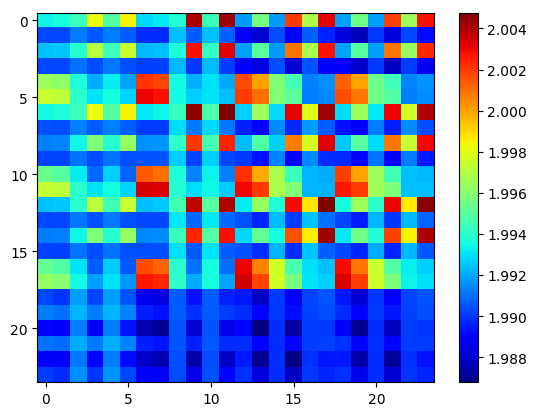

In [80]:
clf()
imshow(scores_matrix, cmap="jet", aspect="auto",
          interpolation="nearest")
colorbar()
show()